In [7]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

임포트

In [8]:
img = cv2.imread('data/houghline.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = 255 - gray

이미지 로드 및 흑백으로 전환

gray = 255 - gray : 이미지 모서리가 외곽선으로 검출되는 것을 막아줌 (배경이 검은색일 때 한함)

In [9]:
ret, thresh = cv2.threshold(gray, 127, 255, 1)

threshold로 보정시킨 이미지를 이용함

In [10]:
_, contours, h = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

외곽선 검출하여 contours에 입력

In [11]:
for count in contours:
    approx = cv2.approxPolyDP(count, 0.01 * cv2.arcLength(count, True), True)
    print len(approx)
    if len(approx) == 5 :
        print "pentagon"
        cv2.drawContours(img, [count], 0, (255, 0, 0), -1)
    elif len(approx) == 3 :
        print "triangle"
        cv2.drawContours(img, [count], 0, (0, 255, 0), -1)
    elif len(approx) == 4 :
        print "square"
        cv2.drawContours(img, [count], 0, (0, 0, 255), -1)
    elif len(approx) == 9 :
        print "half-circle"
        #cv2.drawContours(img, [count], 0, (255, 255, 0), -1)
    elif len(approx) > 15 :
        print "circle"
        #cv2.drawContours(img, [count], 0, (0, 255, 255), -1)

4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square
4
square


외곽선 정보에 approxPolyDP 함수로 도형의 모양 판별하고 결과를 이미지에 그림

격자 내 대부분은 사각형 정상 판별되나 오각형으로 판별하기도 함

흰색 경계 전체도 도형으로 검출되는데 이 결과를 빼기 위해 원 모양은 이미지에 그려넣지 않음

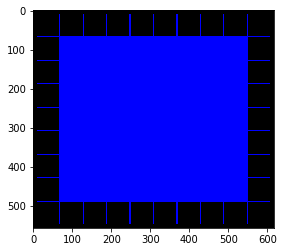

In [12]:
plt.imshow(img)
# cv2.imwrite('data/r_detectshape.png', img)

적색은 오각형, 청색은 사각형